#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [ ]:
import numpy as np
import itertools as it
import time
import matplotlib.pyplot as plt

In [ ]:
weights = np.array([8, 3, 5, 2, 3, 5, 4, 6, 3, 1])
capacity = 9
profits = np.array([16, 8, 9, 6, 5, 11, 7, 7, 9, 2])

In [ ]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    permutations = list(it.product([0, 1], repeat=len(self.profits)))
    best_profit = 0
    best_weight = 0  # waga dla best_profitu
    for permutation in permutations:
      permutation = np.array(list(permutation))
      actual_weight = sum(permutation * self.weights)
      actual_profit = sum(permutation * self.profits)
      if actual_weight <= self.capacity and actual_profit > best_profit:
        best_profit = actual_profit
        best_weight = actual_weight
        best_permutation = permutation
    best_permutation = [i for i in range(len(best_permutation)) if best_permutation[i]]
    return best_permutation, best_profit, best_weight


  def solve_knapsack_pw_ratio(self):
    ratios = self.profits / self.weights
    index = [i for i in range(len(ratios))]
    packs = list(zip(ratios, self.profits, self.weights, index))
    packs.sort(key=lambda x: x[0], reverse=True)
    actual_weight = 0
    actual_profit = 0
    indexes = []
    for ratio in packs:
      if actual_weight + ratio[2] <= self.capacity:
        indexes.append(ratio[3])
        actual_weight += ratio[2]
        actual_profit += ratio[1]
    return indexes, actual_profit, actual_weight

def generate_plot():
  times_for_brute = []
  times_for_her = []
  steps = range(1, len(profits)+1)
  for i in steps:
    Backpack = KnapSack(profits[:i], weights[:i], capacity)
    start = time.time()
    Backpack.solve_knapsack_brute_force()
    stop = time.time()
    times_for_brute.append(stop - start)
    start = time.time()
    Backpack.solve_knapsack_pw_ratio()
    stop = time.time()
    times_for_her.append(stop - start)
  plt.plot(steps, times_for_brute)
  plt.plot(steps, times_for_her)
  plt.show()

([1, 2], 17, 8)
([3, 1], 14, 5)


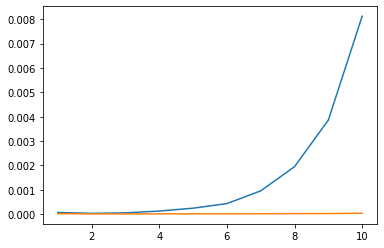

In [ ]:
x = KnapSack(profits[:4], weights[:4], capacity)
print(x.solve_knapsack_brute_force())
print(x.solve_knapsack_pw_ratio())

generate_plot()

Jak widać obie metody mogą dać różne wyniki.
Dla metody brute_force czas znalezienia najlepszego wyniku bardzo wzrasta już dla 8 elementów (jak na powyższym wykresie), gdyż ilość kombinacji rośnie wykładniczo.